## Undersampling Techiques for imbalanced data distribution in fraud detection


### Project Description: Goals/Motivation/Importance 

The class imbalance is a common and established problem that scientists in different fields are trying to solve in classification tasks. In the data set “Credit card Fraud Detection” the positive class (frauds) account for 0.172% of all transactions. If we use all the data in the training set, the classifier tends to predict the incoming data as majority class. Since rare class performance is more important than overall performance, it is important to select corresponding training data for classification when the class distribution is imbalanced. Therefore, the objective of this work is to propose different sampling techniques for selecting the representative training data set and to improve the classification accuracy for the minority class. Also  I compare the impact of sampling methods in the imbalanced class distribution environment. 

### Proposed Methodology and Techniques

-	Random majority under-sampling (RUS)
-	Under-sampling with Cluster Centroids
-	NearMiss-(1 & 2)

Undersampling techniques will be tested with single classifiers: Decision Tree (DT) and Naïve Bayes (NB). 
In addition, an ensemble classifier, Random Forest will be explored.

### Data
- The Credit Card Fraud Detection dataset is from Kaggle (https://www.kaggle.com/mlg-ulb/creditcardfraud/home). 
- It contains 284,807 instances and 30 features.  
- The data set features are a result of PCA transformation so the variables are numeric. Due to confidentiality, the feature names were hidden from the public so they are named V1,..,V28. ‘Time’ and ‘Amount’ features did not undergo PCA and remain unhidden. 
- The target variable is the ‘Class’ variable. There are 2 classes, ‘1’ value in the case of fraudulent transactions and ‘0’ value in the case of non-fraudulent transactions.
- Five data subsets (A-E) with different ratios between minority and majority samples were created by using undersampling techiques. The ratios ranged from 1:1 to 1:5.

<img src="files/figure1.png">




In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.cluster import MiniBatchKMeans
import time
from sklearn.neighbors import NearestNeighbors

In [2]:
creditcard = pd.read_csv("/Users/dianabursac/Documents/DSC540/FINAL/ProjectProposal/creditcard.csv")

In [3]:
creditcard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Bar plot class imbalance

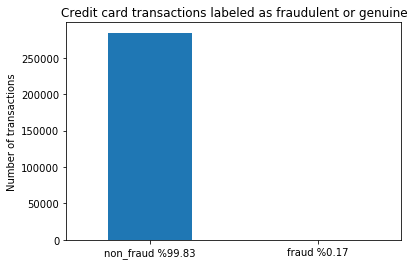

In [4]:
creditcard.Class.value_counts().plot(kind = "bar")
genuine_per = len(creditcard[creditcard.Class == 0])/len(creditcard)
fraud_per = len(creditcard[creditcard.Class == 1])/len(creditcard)
plt.xticks([0,1],['non_fraud %{0:0.2f}'.format(100*genuine_per), 'fraud %{0:0.2f}'.format(100*fraud_per)], rotation='horizontal')
plt.ylabel('Number of transactions')
plt.title('Credit card transactions labeled as fraudulent or genuine')


## Data exploration

In [5]:
creditcard.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [6]:
creditcard.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
# THERE ARE NO MISSING VALUES IN DATA SET
# creditcard.isnull().sum()

In [8]:
creditcard = creditcard.copy()

In [9]:
# features time and account are not normalised and not relevant for the analysis

credit_card = creditcard.drop(columns = ["Time", "Amount"])

## RANDOM MAJORITY UNDERSAMPLING (RUS)|

In [10]:

def randomsampler(X, y):
    '''
    random undersampling algorithm and running time calculation for each subset'''
    
    ratio = [1, 2, 3, 4, 5]
    ratio_index = ["A", "B", "C", "D", "E"]
    dict_data_X={}
    dict_data_y={}
    for value, index in zip(ratio, ratio_index) :
        start = time.time()
        data = pd.concat([X, y], axis = 1)
        count_normal, count_fraud = data.Class.value_counts()
        class_normal = data[data.Class ==0]
        class_fraud = data[data.Class ==1]
        class_normal_resample = class_normal.sample(round(value*count_fraud), random_state = 42)
        new_data = pd.concat([class_normal_resample, class_fraud], axis = 0)
        y_target = new_data["Class"]
        X_data = new_data.drop(["Class"], axis = 1)
        end = time.time()
        print ("Running time for RUS - data set {} is {}\n".format(index, end-start))
        dict_data_X[index] = X_data
        dict_data_y[index] = y_target
    return dict_data_X, dict_data_y


In [11]:
y = credit_card["Class"]
X = credit_card.drop(["Class"], axis =1)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size =0.33, stratify = y )

In [13]:
X_train.shape, X_test.shape

((190820, 28), (93987, 28))

In [14]:
dict_data_X_train, dict_data_y_train = randomsampler(X_train, y_train)

Running time for RUS - data set A is 0.09686422348022461

Running time for RUS - data set B is 0.06766581535339355

Running time for RUS - data set C is 0.07013511657714844

Running time for RUS - data set D is 0.05999588966369629

Running time for RUS - data set E is 0.062242984771728516



## CLUSTER CENTROIDS (CC)

- Cluster Centroids is a technique that under-samples the majority class by replacing cluster of majority samples in the training set by the cluster centroid. 
- A kMeans algorithm is fitted to the train data set and the number of clusters N is at least equal to the number of samples in the minority class. In each iteration kMeans has  to access every  point in the data  set. 
- Since the number of   data  points in the training set in the majority class is very high, kMeans demonstrates very slow performance. 
- This is why the subset of data (mini batch) is used to update the cluster centers at each step. This means I use 10000 instances instead of 190490 at each step. This is the idea behind kMeans –batch algorithm that was used in this project.

In [15]:
import time
def modelClusterCentroids(X, y):
    ''' cluster centroids algorithm and running time calculation for each data set (A-E)'''
    ratio = [1, 2, 3, 4, 5]
    ratio_index = ["A", "B", "C", "D", "E"]
    dict_data_X={}
    dict_data_y={}
    for value, index in zip(ratio, ratio_index):
        start = time.time()
        data = pd.concat([X, y], axis = 1)
        count_normal, count_fraud = data.Class.value_counts()
        class_normal = data[data.Class ==0]
        class_fraud = data[data.Class ==1]
        N_clusters  = int(value*count_fraud)
        from sklearn.cluster import MiniBatchKMeans
        mb_kmeans = MiniBatchKMeans(n_clusters=N_clusters, random_state = 42, init_size = 10000)
        X_normal = class_normal.drop(["Class"], axis = 1)
        X_fraud = class_fraud.drop(["Class"], axis = 1)
        mb_kmeans.fit(X_normal)  # fit majority class
        centroids = mb_kmeans.cluster_centers_  # new majority class points
        centroids_df = pd.DataFrame(centroids, columns = X_normal.columns)
        new_data_X = pd.concat([centroids_df, X_fraud], axis=0)
        new_data_y = pd.concat([class_normal.Class[0:N_clusters], class_fraud.Class], axis =0)
        end = time.time()
        print ("Running time for CC - data set {} is {}\n".format(index, end-start))
        dict_data_X[index] = new_data_X
        dict_data_y[index] = new_data_y
    return dict_data_X, dict_data_y

In [16]:
X_train.shape, X_test.shape

((190820, 28), (93987, 28))

In [17]:
dict_data_X_train_cc, dict_data_y_train_cc = modelClusterCentroids(X_train, y_train)

Running time for CC - data set A is 3.391916036605835

Running time for CC - data set B is 5.578195095062256

Running time for CC - data set C is 7.019392013549805

Running time for CC - data set D is 11.227341890335083

Running time for CC - data set E is 16.638870000839233



# NEARMISS1

- The method NearMiss-1 selects negative examples that are close to some of the positive examples (Zhang & Mani 2003).
- We select the majority class samples whose average distances to three closest minority class samples are the smallest.
- This means that for every majority sample we calculate the vector of distances to three closest minority samples

In [18]:
def NearMiss1_k (X, y, k):
    ''' NearMiss1 algorithm and running time calculation'''
    ratio = [1, 2, 3, 4, 5]
    ratio_index = ["A", "B", "C", "D", "E"]
    dict_data_X={}
    dict_data_y={}
    for value, index in zip(ratio, ratio_index):
        start = time.time()
        data = pd.concat([X,y], axis =1)
        class_normal = data[data.Class ==0]
        class_fraud = data[data.Class ==1]
        count_normal, count_fraud = data.Class.value_counts()
        # For each element of the current class, find the set of NN
        # of the minority class
        # Call the constructor of the NN
        nn_obj = NearestNeighbors(n_neighbors=k)
        X_fraud = class_fraud.drop(["Class"], axis =1)
        # Fit the minority class since that we want to know the distance to these point
        nn_obj.fit(X_fraud)
        # Find the NN
        # numpy array where each row is a vector of k distances
        # shape of dist_vec is number_of_raws in X_normal x k
        X_normal = class_normal.drop(["Class"], axis =1)
        dist_vec, idx_vec = nn_obj.kneighbors(X_normal, n_neighbors=k)
        dist_avg_vec = np.sum(dist_vec[:, 0:k], axis=1)/k
        # add index to dist_vec to specify X_normal records to which it refers
        avg_vec_df = pd.DataFrame(dist_avg_vec, index = X_normal.index)
        # there is one column "0"
        avg_vec_sorted = avg_vec_df.sort_values(by = [0])
        # take first ratio*count_frauds raws
        nearest_v = avg_vec_sorted.iloc[0:(value*count_fraud), :]
        X_normal_new = X_normal.loc[nearest_v.index]
        y_normal = class_normal["Class"]
        y_normal_new = y_normal.loc[nearest_v.index]
        new_data_X = pd.concat([X_normal_new, X_fraud], axis=0)
        new_data_y = pd.concat([y_normal_new, class_fraud.Class], axis =0)
        end = time.time()
        print ("Running time for NM1 k=3, data set {} is {}\n".format(index, end-start))
        dict_data_X[index] = new_data_X
        dict_data_y[index] = new_data_y
    return dict_data_X, dict_data_y
        

In [19]:
# calculate for k=3 nearest neighbors
dict_data_X_nm1_k3, dict_data_y_nm1_k3 = NearMiss1_k(X_train, y_train, k= 3)

Running time for NM1 k=3, data set A is 2.4427690505981445

Running time for NM1 k=3, data set B is 2.5389060974121094

Running time for NM1 k=3, data set C is 2.5940120220184326

Running time for NM1 k=3, data set D is 2.477656126022339

Running time for NM1 k=3, data set E is 2.274423837661743



# NEARMISS2

- This method NearMiss-2 selects negative examples that are close to all positive examples (Zhang & Mani 2003).
- In this method, majority class samples are selected based on their average distances to three farthest minority class samples

In [20]:
def NearMiss2_k(X, y, k):
    ''' NearMiss2 algorithm and running time calculation'''
    ratio = [1, 2, 3, 4, 5]
    ratio_index = ["A", "B", "C", "D", "E"]
    dict_data_X={}
    dict_data_y={}
    for value, index in zip(ratio, ratio_index):
        start = time.time()
        data = pd.concat([X,y], axis =1)
        class_normal = data[data.Class ==0]
        class_fraud = data[data.Class ==1]
        count_normal, count_fraud = data.Class.value_counts()
        # For each element of the current class, find the set of NN
        # of the minority class
        # Call the constructor of the NN
        nn_obj = NearestNeighbors(n_neighbors=k)
        X_fraud = class_fraud.drop(["Class"], axis =1)
        # Fit the minority class since that we want to know the distance to these point
        nn_obj.fit(X_fraud)
        # Find the NN
        # numpy array where each row is a vector of k distances
        # shape of dist_vec is number_of_raws in (X_normal x k)
        X_normal = class_normal.drop(["Class"], axis =1)
        dist_vec, idx_vec = nn_obj.kneighbors(X_normal,n_neighbors=count_fraud)
        dist_avg_vec = np.sum(dist_vec[:,-k:], axis=1)
        # add index to dist_vec to specify X_normal records to which it refers
        avg_vec_df = pd.DataFrame(dist_avg_vec, index = X_normal.index)
        # there is one column "0"
        avg_vec_sorted = avg_vec_df.sort_values(by = [0], ascending = False)
        # take first ratio*count_frauds raws
        count = value*count_fraud
        farthest_v = avg_vec_sorted.iloc[0:count, :]
        X_normal_new = X_normal.loc[farthest_v.index]
        y_normal = class_normal["Class"]
        y_normal_new = y_normal.loc[farthest_v.index]
        new_data_X = pd.concat([X_normal_new, X_fraud], axis=0)
        new_data_y = pd.concat([y_normal_new, class_fraud.Class], axis =0)
        print("Running time for NM2 k=3 for data set {} is {}\n".format(index, time.time()-start))
        dict_data_X[index] = new_data_X
        dict_data_y[index] = new_data_y
    return dict_data_X, dict_data_y

In [21]:
dict_data_X_nm2_k3, dict_data_y_nm2_k3 = NearMiss2_k(X_train, y_train, k=3)

Running time for NM2 k=3 for data set A is 10.960097789764404

Running time for NM2 k=3 for data set B is 17.790771007537842

Running time for NM2 k=3 for data set C is 11.411749124526978

Running time for NM2 k=3 for data set D is 9.89729380607605

Running time for NM2 k=3 for data set E is 10.767789840698242



# MODEL BUILDING  and REPORTED MEASURES 
## (confusion matrix, F1, predicted probabilities)

In [22]:
dt_clf = DecisionTreeClassifier()
nb_clf = GaussianNB()
rf_clf = RandomForestClassifier()

In [23]:
def modelbuilding(X_train, X_test, y_train, clf):
    ''' Decision Tree , Naive Bayes and Random Forest classifiers for the predictions with
    hyper parameter tuning'''
    if clf == dt_clf:
        param_grid = [{"max_depth":[5,7,10,12, 13, 15], "min_samples_leaf":[3,4,5,6,7,8,10,12]}]
        grid_search = GridSearchCV(dt_clf, param_grid, cv = 5, scoring = "f1")
        grid_search.fit(X_train,y_train)
        dt = grid_search.best_params_
        dt_clf2 = DecisionTreeClassifier(max_depth = dt["max_depth"], min_samples_leaf = dt["min_samples_leaf"])
        dt_clf2.fit(X_train, y_train)
        y_train_pred = dt_clf2.predict(X_train)
        y_test_pred = dt_clf2.predict(X_test)
        #y_train_pred_prob= dt_clf2.predict_proba(X_train)[:,1]
        #y_test_pred_prob= dt_clf2.predict_proba(X_test)[:,1]
        y_train_pred_prob= dt_clf2.predict_proba(X_train)
        y_test_pred_prob= dt_clf2.predict_proba(X_test)
    elif clf == nb_clf:
        nb_clf.fit(X_train, y_train)
        y_train_pred = nb_clf.predict(X_train)
        y_test_pred = nb_clf.predict(X_test)
        #y_train_pred_prob= nb_clf.predict_proba(X_train)[:,1]
        #y_test_pred_prob= nb_clf.predict_proba(X_test)[:,1]
        y_train_pred_prob= nb_clf.predict_proba(X_train)
        y_test_pred_prob= nb_clf.predict_proba(X_test)
    elif clf == rf_clf:
        param_grid = {"n_estimators":[10, 16, 32, 64, 100, 200, 500]}
        grid_search = GridSearchCV(rf_clf, param_grid, cv = 5, scoring = "f1")
        grid_search.fit(X_train,y_train)
        d_rf = grid_search.best_params_
        rf_clf2 = RandomForestClassifier(n_estimators =d_rf["n_estimators"], max_depth = 5, min_samples_leaf = 10)
        rf_clf2.fit(X_train, y_train)
        y_train_pred = rf_clf2.predict(X_train)
        y_test_pred = rf_clf2.predict(X_test)
        #y_train_pred_prob= rf_clf2.predict_proba(X_train)[:,1]
        #y_test_pred_prob= rf_clf2.predict_proba(X_test)[:,1]
        y_train_pred_prob= rf_clf2.predict_proba(X_train)
        y_test_pred_prob= rf_clf2.predict_proba(X_test)
    d_y_train = {"y_train_pred":y_train_pred, "y_train_pred_prob":y_train_pred_prob}
    d_y_test = {"y_test_pred":y_test_pred, "y_test_pred_prob":y_test_pred_prob}
    return d_y_train, d_y_test    
  

In [24]:
def Statistics(y_train, y_train_predict, y_test, y_test_predict):
    '''calculate statistics f1 score and confusion matrix'''
    CM_train = confusion_matrix(y_train, y_train_predict, labels=[0,1])
    CM_test = confusion_matrix(y_test, y_test_predict, labels=[0,1])
    tn_tr, fp_tr, fn_tr, tp_tr = CM_train.ravel()
    tn_te, fp_te, fn_te, tp_te = CM_test.ravel()
    sensitivity_train = tp_tr /(tp_tr+fn_tr)  # tp/(tp+fn)
    specificity_train = tn_tr /(tn_tr+fp_tr)  # tn/(tn+fp)
    sensitivity_test = tp_te /(tp_te+fn_te)  # tp/(tp+fn)
    specificity_test = tn_te /(tn_te+fp_te)  # tn/(tn+fp)
    precision = tp_te /(tp_te+fp_te) # tp/(tp+fp)
    f1_score = 2*sensitivity_test*precision/(sensitivity_test+precision)
    d_matricies = {"CM_train":CM_train, "CM_test":CM_test}
    d_f = {"f1":f1_score}
    return d_matricies, d_f
    

## COLLECT STATISTICS FOR RANDOM UNDERSAMPLING

In [25]:
def collectStatistics_rus(clf):
    '''collect f1 scores, confusion matrices and precicted probablities for all five datasets (A-E) 
     created from random undersampling'''
    key = ["A", "B", "C", "D", "E"]
    matrix_test_all = []
    y_test_pred_all =[]
    y_test_prob_all =[]
    f_all = []
    for value in key:
        X_train_rs = dict_data_X_train[value]
        y_train_rs = dict_data_y_train[value]
        d_y_train, d_y_test = modelbuilding(X_train_rs, X_test, y_train_rs, clf)
        d_matricies, d_f = Statistics(y_train_rs,d_y_train["y_train_pred"],y_test,d_y_test["y_test_pred"])
        matrix_test_all.append(d_matricies["CM_test"])
        f_all.append(d_f["f1"])
        y_test_pred_all.append(d_y_test["y_test_pred"])
        y_test_prob_all.append(d_y_test["y_test_pred_prob"])
    return matrix_test_all, f_all, y_test_pred_all, y_test_prob_all

In [26]:
matrix_test_nb, f1_nb, y_test_pred_nb, y_test_prob_nb =collectStatistics_rus(clf = nb_clf)

In [27]:
matrix_test_dt, f1_dt, y_test_pred_dt, y_test_prob_dt =collectStatistics_rus(clf = dt_clf)

In [28]:
matrix_test_rf, f1_rf, y_test_pred_rf, y_test_prob_rf =collectStatistics_rus(clf = rf_clf)

In [29]:
f1_rf

[0.15626756604834174,
 0.26926829268292685,
 0.49816849816849818,
 0.5291828793774318,
 0.62790697674418594]

## COLLECT STATISTICS FOR CLUSTER CENTROIDS

In [30]:
def collectStatistics_cc(clf):
    '''collect f1 scores, confusion matrices and precicted probablities for all five datasets (A-E) 
     created from cluster centroids'''
    key = ["A", "B", "C", "D", "E"]
    matrix_test_all = []
    y_test_pred_all =[]
    y_test_prob_all =[]
    f_all = []
    for value in key:
        X_train_cc = dict_data_X_train_cc[value]
        y_train_cc = dict_data_y_train_cc[value]
        d_y_train, d_y_test = modelbuilding(X_train_cc, X_test, y_train_cc, clf)
        d_matricies, d_f = Statistics(y_train_cc,d_y_train["y_train_pred"],y_test,d_y_test["y_test_pred"])
        matrix_test_all.append(d_matricies["CM_test"])
        f_all.append(d_f["f1"])
        y_test_pred_all.append(d_y_test["y_test_pred"])
        y_test_prob_all.append(d_y_test["y_test_pred_prob"])
    return matrix_test_all, f_all, y_test_pred_all, y_test_prob_all

In [31]:
matrix_test_cc_nb, f1_cc_nb, y_test_pred_cc_nb, y_test_prob_cc_nb =collectStatistics_cc(clf = nb_clf)

In [32]:
matrix_test_cc_dt, f1_cc_nb, y_test_pred_cc_dt, y_test_prob_cc_dt =collectStatistics_cc(clf = dt_clf)

In [33]:
matrix_test_cc_rf, f1_cc_rf, y_test_pred_cc_rf, y_test_prob_cc_rf =collectStatistics_cc(clf = rf_clf)

## COLLECT STATISTICS FOR NEARMISS1

In [34]:
def collectStatistics_nm1(clf):
    '''collect f1 scores, confusion matrices and precicted probablities for all five datasets (A-E) 
     created from nearmiss1'''
    key = ["A", "B", "C", "D", "E"]
    matrix_test_all = []
    y_test_pred_all =[]
    y_test_prob_all =[]
    f_all = []
    for value in key:
        X_train_nm1 = dict_data_X_nm1_k3[value]
        y_train_nm1 = dict_data_y_nm1_k3[value]
        d_y_train, d_y_test = modelbuilding(X_train_nm1, X_test, y_train_nm1, clf)
        d_matricies, d_f = Statistics(y_train_nm1,d_y_train["y_train_pred"],y_test,d_y_test["y_test_pred"])
        matrix_test_all.append(d_matricies["CM_test"])
        f_all.append(d_f["f1"])
        y_test_pred_all.append(d_y_test["y_test_pred"])
        y_test_prob_all.append(d_y_test["y_test_pred_prob"])
    return matrix_test_all, f_all, y_test_pred_all, y_test_prob_all

In [35]:
matrix_test_nm1_nb, f1_nm1_nb, y_test_pred_nm1_nb, y_test_prob_nm1_nb =collectStatistics_nm1(clf = nb_clf)

In [36]:
f1_nm1_nb

[0.00903059343899742,
 0.0077370443452071868,
 0.0073971568750786261,
 0.0073236349143084899,
 0.0074195583596214513]

In [37]:
matrix_test_nm1_dt, f1_nm1_dt, y_test_pred_nm1_dt, y_test_prob_nm1_dt =collectStatistics_nm1(clf = dt_clf)

In [38]:
matrix_test_nm1_rf, f1_nm1_rf, y_test_pred_nm1_rf, y_test_prob_nm1_rf =collectStatistics_nm1(clf = rf_clf)

## COLLECT STATISTICS FOR NEARMISS2¶

In [39]:
def collectStatistics_nm2(clf):
    '''collect f1 scores, confusion matrices and precicted probablities for all five datasets (A-E) 
     created from nearmiss2'''
    key = ["A", "B", "C", "D", "E"]
    matrix_test_all = []
    y_test_pred_all =[]
    y_test_prob_all =[]
    f_all = []
    for value in key:
        X_train_nm2 = dict_data_X_nm2_k3[value]
        y_train_nm2 = dict_data_y_nm2_k3[value]
        d_y_train, d_y_test = modelbuilding(X_train_nm2, X_test, y_train_nm2, clf)
        d_matricies, d_f = Statistics(y_train_nm2,d_y_train["y_train_pred"],y_test,d_y_test["y_test_pred"])
        matrix_test_all.append(d_matricies["CM_test"])
        f_all.append(d_f["f1"])
        y_test_pred_all.append(d_y_test["y_test_pred"])
        y_test_prob_all.append(d_y_test["y_test_pred_prob"])
    return matrix_test_all, f_all, y_test_pred_all, y_test_prob_all

In [40]:
matrix_test_nm2_nb, f1_nm2_nb, y_test_pred_nm2_nb, y_test_prob_nm2_nb =collectStatistics_nm2(clf = nb_clf)

In [41]:
matrix_test_nm2_dt, f1_nm2_dt, y_test_pred_nm2_dt, y_test_prob_nm2_dt =collectStatistics_nm2(clf = dt_clf)

In [42]:
matrix_test_nm2_rf, f1_nm2_rf, y_test_pred_nm2_rf, y_test_prob_nm2_rf =collectStatistics_nm2(clf = rf_clf)

# REPORTED MEASURES
### (PRECISION-RECALL AUC )

- F value and AUC are commonly used in imbalance classifications because they concentrate on minority classes and specifically on false positives (FP) – non frauds detected as frauds and false negatives (FN) – frauds that are detected as non-frauds.
- A low f1 score still doesn’t mean that classifier performs poorly, since it is important how a classifier behaves across many different threshold values and not just one. We want our classifier to achieve high recall meaning to reduce the number of FN, but in the same time to have high precision therefore to reduce FP as much as it is possible.

### PRECISION RECALL CURVES across different subsets (A-E) with Random Undersampling 

0.0485533754573 0.464858894887
0.0866093366093 0.638687098133
0.181575433912 0.478436419577
0.212168486739 0.569194186091
0.286014721346 0.638554040915


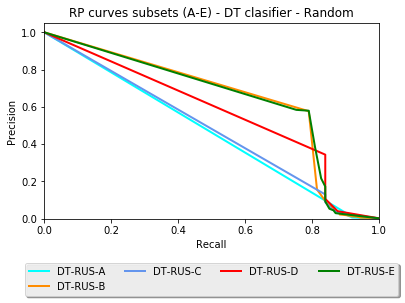

In [43]:
# DECISION TREE CLASSIFIER

colors = ['aqua', 'darkorange', 'cornflowerblue', "red","green"]
y_test_prob_sets = [y_test_prob_dt[0][:,1], y_test_prob_dt[1][:,1], y_test_prob_dt[2][:,1],y_test_prob_dt[3][:,1],y_test_prob_dt[4][:,1]]
titles=["DT-RUS-A", "DT-RUS-B", "DT-RUS-C", "DT-RUS-D","DT-RUS-E"]
y_pred_sets = [y_test_pred_dt[0], y_test_pred_dt[1], y_test_pred_dt[2], y_test_pred_dt[3], y_test_pred_dt[4]]

plt.figure()
ax = plt.subplot(111)
for y_prob,y_pred, title, color in zip(y_test_prob_sets,y_pred_sets,titles, colors):
    # Compute ROC curve and area the curve
    precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_prob)
    auc = metrics.auc(recall, precision)
    plt.plot(recall, precision, color=color, lw=2, label='{}'.format(title))
    f1 = metrics.f1_score(y_test, y_pred)
    print (f1, auc)
    #plt.plot([0, 1], [0, 1], color="navy",linestyle='--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('RP curves subsets (A-E) - DT clasifier - Random')
# Shrink current axis's height by 10% on the bottom
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=4)
plt.show()


0.0834868017188 0.423820031914
0.0977011494253 0.427549452043
0.119521912351 0.43997059183
0.112640801001 0.431686995688
0.111627906977 0.410023940522


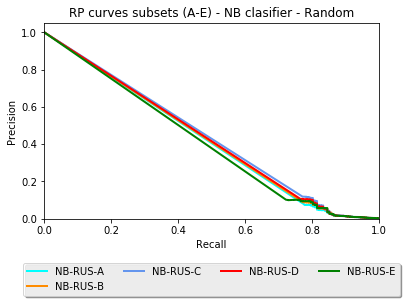

In [44]:
# NAIVE BAYES

colors = ['aqua', 'darkorange', 'cornflowerblue', "red","green"]
y_test_prob_sets = [y_test_prob_nb[0][:,1], y_test_prob_nb[1][:,1], y_test_prob_nb[2][:,1],y_test_prob_nb[3][:,1],y_test_prob_nb[4][:,1]]
titles=["NB-RUS-A", "NB-RUS-B", "NB-RUS-C", "NB-RUS-D","NB-RUS-E"]
y_pred_sets = [y_test_pred_nb[0], y_test_pred_nb[1], y_test_pred_nb[2], y_test_pred_nb[3], y_test_pred_nb[4]]


plt.figure()
ax = plt.subplot(111)
for y_prob,y_pred, title, color in zip(y_test_prob_sets,y_pred_sets,titles, colors):
    # Compute ROC curve and area the curve
    precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_prob)
    auc = metrics.auc(recall, precision)
    plt.plot(recall, precision, color=color, lw=2, label='{}'.format(title))
    f1 = metrics.f1_score(y_test, y_pred)
    print (f1, auc)


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('RP curves subsets (A-E) - NB clasifier - Random')
# Shrink current axis's height by 10% on the bottom
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=4)
plt.show()


0.156267566048 0.664182795824
0.269268292683 0.683771655933
0.498168498168 0.720091436238
0.529182879377 0.723050520471
0.627906976744 0.708180989149


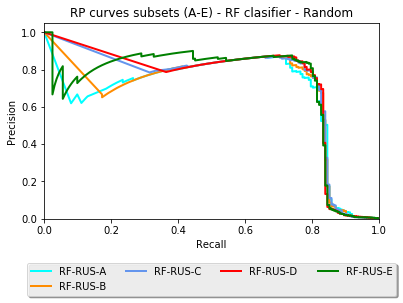

In [45]:
# RANDOM FOREST


colors = ['aqua', 'darkorange', 'cornflowerblue', "red","green"]
y_test_prob_sets = [y_test_prob_rf[0][:,1], y_test_prob_rf[1][:,1], y_test_prob_rf[2][:,1],y_test_prob_rf[3][:,1],y_test_prob_rf[4][:,1]]
titles=["RF-RUS-A", "RF-RUS-B", "RF-RUS-C", "RF-RUS-D","RF-RUS-E"]
y_pred_sets = [y_test_pred_rf[0], y_test_pred_rf[1], y_test_pred_rf[2], y_test_pred_rf[3], y_test_pred_rf[4]]

plt.figure()
ax = plt.subplot(111)
for y_prob,y_pred, title, color in zip(y_test_prob_sets,y_pred_sets,titles, colors):
    # Compute ROC curve and area the curve
    precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_prob)
    auc = metrics.auc(recall, precision)
    plt.plot(recall, precision, color=color, lw=2, label='{}'.format(title))
    f1 = metrics.f1_score(y_test, y_pred)
    print (f1,auc)
#plt.plot([0, 1], [0, 1], color="navy",linestyle='--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('RP curves subsets (A-E) - RF clasifier - Random')
# Shrink current axis's height by 10% on the bottom
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=4)
plt.show()

#### Histogram of predicted fraud probabilities for Random Undersampling across different classifiers

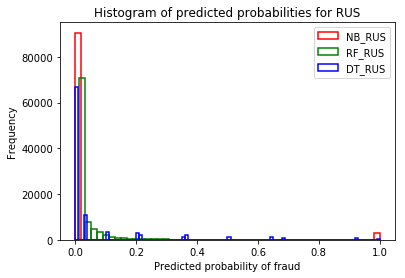

In [46]:
x = y_test_prob_nb[0][:,1]
y = y_test_prob_rf[4][:,1]
z = y_test_prob_dt[1][:,1]

fig, ax = plt.subplots()
ax.hist(x, 50, ec='red', fc='none', lw=1.5, label='NB_RUS')
ax.hist(y, 50, ec='green', fc='none', lw=1.5, label='RF_RUS')
ax.hist(z, 100, ec='blue', fc='none', lw=1.5, label='DT_RUS')
ax.legend(loc='upper right')
plt.title("Histogram of predicted probabilities for RUS")
plt.xlabel("Predicted probability of fraud")
plt.ylabel("Frequency")
plt.show()

### PRECISION RECALL CURVES across different subsets (A-E) with Cluster Centroids

0.0984195402299 0.403145551931
0.0433485157845 0.435783361194
0.292735042735 0.364914376565
0.238961038961 0.554740474267
0.339529120198 0.671990569454


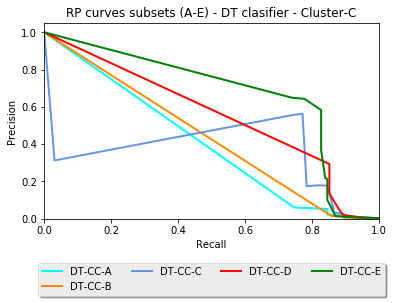

In [47]:
# DECISION TREE

colors = ['aqua', 'darkorange', 'cornflowerblue', "red","green"]
y_test_prob_sets = [y_test_prob_cc_dt[0][:,1], y_test_prob_cc_dt[1][:,1], y_test_prob_cc_dt[2][:,1],y_test_prob_cc_dt[3][:,1],y_test_prob_cc_dt[4][:,1]]
titles=["DT-CC-A", "DT-CC-B", "DT-CC-C", "DT-CC-D","DT-CC-E"]
y_pred_sets = [y_test_pred_cc_dt[0], y_test_pred_cc_dt[1], y_test_pred_cc_dt[2], y_test_pred_cc_dt[3], y_test_pred_cc_dt[4]]

plt.figure()
ax = plt.subplot(111)
for y_prob,y_pred, title, color in zip(y_test_prob_sets,y_pred_sets,titles, colors):
    # Compute ROC curve and area the curve
    precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_prob)
    auc = metrics.auc(recall, precision)
    plt.plot(recall, precision, color=color, lw=2, label='{}'.format(title))
    f1 = metrics.f1_score(y_test, y_pred)
    print (f1,auc)
    
#plt.plot([0, 1], [0, 1], color="navy",linestyle='--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('RP curves subsets (A-E) - DT clasifier - Cluster-C')
# Shrink current axis's height by 10% on the bottom
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=4)
plt.show()

0.129745314753 0.45507735761
0.344198174707 0.545659775753
0.350132625995 0.538201462932
0.298642533937 0.496461227427
0.316926770708 0.508156413172


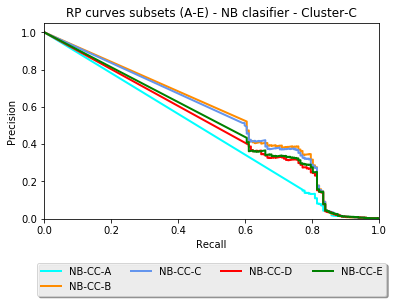

In [48]:
# NAIVE BAYES

colors = ['aqua', 'darkorange', 'cornflowerblue', "red","green"]
y_test_prob_sets = [y_test_prob_cc_nb[0][:,1], y_test_prob_cc_nb[1][:,1], y_test_prob_cc_nb[2][:,1],y_test_prob_cc_nb[3][:,1],y_test_prob_cc_nb[4][:,1]]
titles=["NB-CC-A", "NB-CC-B", "NB-CC-C", "NB-CC-D","NB-CC-E"]
y_pred_sets = [y_test_pred_cc_nb[0], y_test_pred_cc_nb[1], y_test_pred_cc_nb[2], y_test_pred_cc_nb[3], y_test_pred_cc_nb[4]]

plt.figure()
ax = plt.subplot(111)
for y_prob,y_pred, title, color in zip(y_test_prob_sets,y_pred_sets,titles, colors):
    # Compute ROC curve and area the curve
    precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_prob)
    auc = metrics.auc(recall, precision)
    plt.plot(recall, precision, color=color, lw=2, label='{}'.format(title))
    f1 = metrics.f1_score(y_test, y_pred)
    print (f1,auc)
#plt.plot([0, 1], [0, 1], color="navy",linestyle='--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
#plt.xlim([0.5, 1.0])
#plt.ylim([0.0, 0.6])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('RP curves subsets (A-E) - NB clasifier - Cluster-C')
# Shrink current axis's height by 10% on the bottom
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=4)
plt.show()



0.211890243902 0.698268004181
0.649164677804 0.702698522232
0.723860589812 0.726201800937
0.733695652174 0.738800970796
0.708661417323 0.751606101773


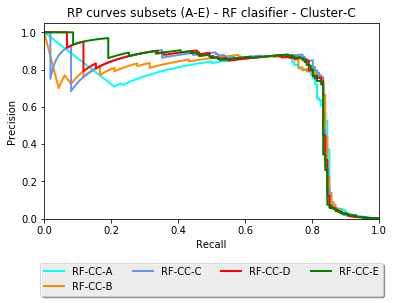

In [49]:
# RANDOM FOREST

colors = ['aqua', 'darkorange', 'cornflowerblue', "red","green"]
y_test_prob_sets = [y_test_prob_cc_rf[0][:,1], y_test_prob_cc_rf[1][:,1], y_test_prob_cc_rf[2][:,1],y_test_prob_cc_rf[3][:,1],y_test_prob_cc_rf[4][:,1]]
titles=["RF-CC-A", "RF-CC-B", "RF-CC-C", "RF-CC-D","RF-CC-E"]
y_pred_sets = [y_test_pred_cc_rf[0], y_test_pred_cc_rf[1], y_test_pred_cc_rf[2], y_test_pred_cc_rf[3], y_test_pred_cc_rf[4]]

plt.figure()
ax = plt.subplot(111)
for y_prob,y_pred, title, color in zip(y_test_prob_sets,y_pred_sets,titles, colors):
    # Compute ROC curve and area the curve
    precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_prob)
    auc = metrics.auc(recall, precision)
    plt.plot(recall, precision, color=color, lw=2, label='{}'.format(title))
    f1 =metrics.f1_score(y_test,y_pred)
    print(f1, auc)
    
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('RP curves subsets (A-E) - RF clasifier - Cluster-C')
# Shrink current axis's height by 10% on the bottom
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=4)
plt.show()

#### Histogram of predicted probabilities for Cluster Centroids across different classifiers

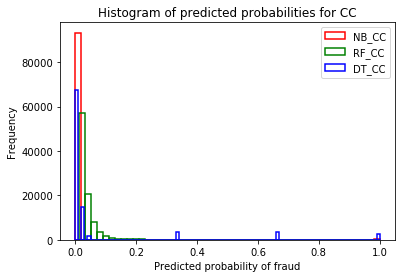

In [50]:
x = y_test_prob_cc_nb[1][:,1]
y = y_test_prob_cc_rf[3][:,1]
z = y_test_prob_cc_dt[1][:,1]

fig, ax = plt.subplots()
ax.hist(x, 50, ec='red', fc='none', lw=1.5, label='NB_CC')
ax.hist(y, 50, ec='green', fc='none', lw=1.5, label='RF_CC')
ax.hist(z, 100, ec='blue', fc='none', lw=1.5, label='DT_CC')
ax.legend(loc='upper right')
plt.title("Histogram of predicted probabilities for CC")
plt.xlabel("Predicted probability of fraud")
plt.ylabel("Frequency")
plt.show()

### PRECISION RECALL CURVES across different subsets (A-E) with NearMiss1

0.00396008444683 0.42699254028
0.00393311106481 0.464064368731
0.00726969079254 0.443411043935
0.00641279044231 0.425379493498
0.00593471810089 0.440947252269


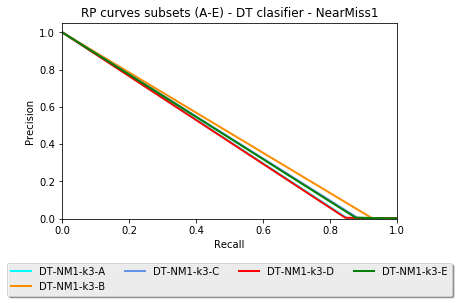

In [51]:
# DECISION TREE

colors = ['aqua', 'darkorange', 'cornflowerblue', "red","green"]
y_test_prob_sets = [y_test_prob_nm1_dt[0][:,1], y_test_prob_nm1_dt[1][:,1], y_test_prob_nm1_dt[2][:,1],y_test_prob_nm1_dt[3][:,1],y_test_prob_nm1_dt[4][:,1]]
titles=["DT-NM1-k3-A", "DT-NM1-k3-B", "DT-NM1-k3-C", "DT-NM1-k3-D","DT-NM1-k3-E"]
y_pred_sets = [y_test_pred_nm1_dt[0], y_test_pred_nm1_dt[1], y_test_pred_nm1_dt[2], y_test_pred_nm1_dt[3], y_test_pred_nm1_dt[4]]

plt.figure()
ax = plt.subplot(111)
for y_prob,y_pred, title, color in zip(y_test_prob_sets,y_pred_sets,titles, colors):
    # Compute ROC curve and area the curve
    precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_prob)
    auc = metrics.auc(recall, precision)
    plt.plot(recall, precision, color=color, lw=2, label='{}'.format(title))
    f1 = metrics.f1_score(y_test,y_pred)
    print(f1,auc)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('RP curves subsets (A-E) - DT clasifier - NearMiss1')
# Shrink current axis's height by 10% on the bottom
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=4)
plt.show()

0.009030593439 0.445250240895
0.00773704434521 0.444765018004
0.00739715687508 0.444611083148
0.00732363491431 0.447616057041
0.00741955835962 0.447639592086


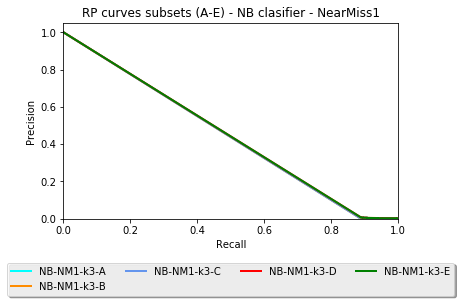

In [52]:
# NAIVE BAYES

colors = ['aqua', 'darkorange', 'cornflowerblue', "red","green"]
y_test_prob_sets = [y_test_prob_nm1_nb[0][:,1], y_test_prob_nm1_nb[1][:,1], y_test_prob_nm1_nb[2][:,1],y_test_prob_nm1_nb[3][:,1],y_test_prob_nm1_nb[4][:,1]]
titles=["NB-NM1-k3-A", "NB-NM1-k3-B", "NB-NM1-k3-C", "NB-NM1-k3-D","NB-NM1-k3-E"]
y_pred_sets = [y_test_pred_nm1_nb[0], y_test_pred_nm1_nb[1], y_test_pred_nm1_nb[2], y_test_pred_nm1_nb[3], y_test_pred_nm1_nb[4]]

plt.figure()
ax = plt.subplot(111)
for y_prob,y_pred, title, color in zip(y_test_prob_sets,y_pred_sets,titles, colors):
    # Compute ROC curve and area the curve
    precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_prob)
    auc = metrics.auc(recall, precision)
    plt.plot(recall, precision, color=color, lw=2, label='{}'.format(title))
    f1 = metrics.f1_score(y_test,y_pred)
    print(f1, auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('RP curves subsets (A-E) - NB clasifier - NearMiss1')
# Shrink current axis's height by 10% on the bottom
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=4)
plt.show()

0.00475293972408 0.763641586752
0.00715277287593 0.757568288555
0.00838492933892 0.782045930879
0.00993670455319 0.745688122027
0.00938401547094 0.743733891057


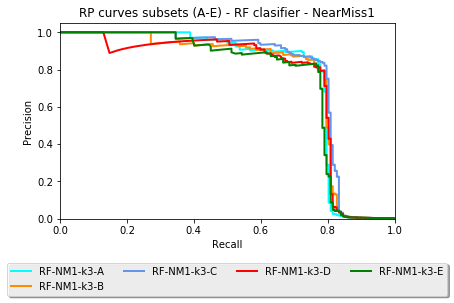

In [53]:
# RANDOM FOREST

colors = ['aqua', 'darkorange', 'cornflowerblue', "red","green"]
y_test_prob_sets = [y_test_prob_nm1_rf[0][:,1], y_test_prob_nm1_rf[1][0:,1], y_test_prob_nm1_rf[2][:,1],y_test_prob_nm1_rf[3][:,1],y_test_prob_nm1_rf[4][:,1]]
titles=["RF-NM1-k3-A", "RF-NM1-k3-B", "RF-NM1-k3-C", "RF-NM1-k3-D","RF-NM1-k3-E"]
y_pred_sets = [y_test_pred_nm1_rf[0], y_test_pred_nm1_rf[1], y_test_pred_nm1_rf[2], y_test_pred_nm1_rf[3], y_test_pred_nm1_rf[4]]

plt.figure()
ax = plt.subplot(111)
for y_prob,y_pred, title, color in zip(y_test_prob_sets,y_pred_sets,titles, colors):
    # Compute ROC curve and area the curve
    precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_prob)
    auc = metrics.auc(recall, precision)
    plt.plot(recall, precision, color=color, lw=2, label='{}'.format(title))
    f1 = metrics.f1_score(y_test,y_pred)
    average_precision = metrics.average_precision_score(y_test, y_prob)
    print(f1, auc)
    
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('RP curves subsets (A-E) - RF clasifier - NearMiss1')
# Shrink current axis's height by 10% on the bottom
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=4)
plt.show()

### Histogram of predicted probabilities for NearMiss1 across different classifiers

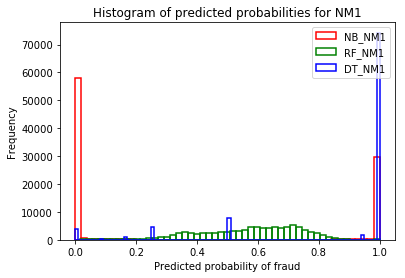

In [54]:
x = y_test_prob_nm1_nb[0][:,1]
y = y_test_prob_nm1_rf[0][:,1]
z = y_test_prob_nm1_dt[0][:,1]

fig, ax = plt.subplots()
ax.hist(x, 50, ec='red', fc='none', lw=1.5, label='NB_NM1')
ax.hist(y, 50, ec='green', fc='none', lw=1.5, label='RF_NM1')
ax.hist(z, 100, ec='blue', fc='none', lw=1.5, label='DT_NM1')
ax.legend(loc='upper right')
plt.title("Histogram of predicted probabilities for NM1")
plt.xlabel("Predicted probability of fraud")
plt.ylabel("Frequency")
plt.show()

## PRECISION RECALL CURVES across different subsets (A-E) with NearMiss2

0.00356446297666
0.00377894411856
0.00372467409102
0.00469892384786
0.00642573941576


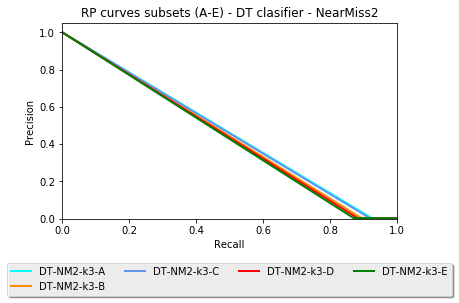

In [55]:
# DECISION TREE

colors = ['aqua', 'darkorange', 'cornflowerblue', "red","green"]
y_test_prob_sets = [y_test_prob_nm2_dt[0][:,1], y_test_prob_nm2_dt[1][:,1], y_test_prob_nm2_dt[2][:,1],y_test_prob_nm2_dt[3][:,1],y_test_prob_nm2_dt[4][:,1]]
titles=["DT-NM2-k3-A", "DT-NM2-k3-B", "DT-NM2-k3-C", "DT-NM2-k3-D","DT-NM2-k3-E"]
y_pred_sets = [y_test_pred_nm2_dt[0], y_test_pred_nm2_dt[1], y_test_pred_nm2_dt[2], y_test_pred_nm2_dt[3], y_test_pred_nm2_dt[4]]

plt.figure()
ax = plt.subplot(111)
for y_prob,y_pred, title, color in zip(y_test_prob_sets,y_pred_sets,titles, colors):
    # Compute ROC curve and area the curve
    precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_prob)
    auc = metrics.auc(recall, precision)
    plt.plot(recall, precision, color=color, lw=2, label='{}'.format(title, auc))
    f1 = metrics.f1_score(y_test,y_pred)
    print(f1)

    #plt.plot([0, 1], [0, 1], color="navy",linestyle='--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('RP curves subsets (A-E) - DT clasifier - NearMiss2')
# Shrink current axis's height by 10% on the bottom
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=4)
plt.show()

0.00376775642976 0.675828466524
0.0699619771863 0.686405825413
0.266932270916 0.673680536445
0.345360824742 0.6535117118
0.382857142857 0.637168354372


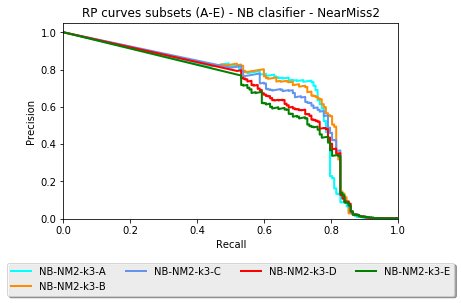

In [56]:

# NAIVE BAYES

colors = ['aqua', 'darkorange', 'cornflowerblue', "red","green"]
y_test_prob_sets = [y_test_prob_nm2_nb[0][:,1], y_test_prob_nm2_nb[1][:,1], y_test_prob_nm2_nb[2][:,1],y_test_prob_nm2_nb[3][:,1],y_test_prob_nm2_nb[4][:,1]]
titles=["NB-NM2-k3-A", "NB-NM2-k3-B", "NB-NM2-k3-C", "NB-NM2-k3-D","NB-NM2-k3-E"]
y_pred_sets = [y_test_pred_nm2_nb[0], y_test_pred_nm2_nb[1], y_test_pred_nm2_nb[2], y_test_pred_nm2_nb[3], y_test_pred_nm2_nb[4]]

plt.figure()
ax = plt.subplot(111)
for y_prob,y_pred, title, color in zip(y_test_prob_sets,y_pred_sets,titles, colors):
    # Compute ROC curve and area the curve
    precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_prob)
    auc = metrics.auc(recall, precision)
    plt.plot(recall, precision, color=color, lw=2, label='{}'.format(title))
    f1 = metrics.f1_score(y_test,y_pred)
    print(f1,auc)
    
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('RP curves subsets (A-E) - NB clasifier - NearMiss2')
# Shrink current axis's height by 10% on the bottom
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=4)
plt.show()

0.00351298470295 0.44350974357
0.00356209648126 0.572014471826
0.00413587735745 0.568684201824
0.00739219712526 0.557999539732
0.0260247234873 0.622870521587


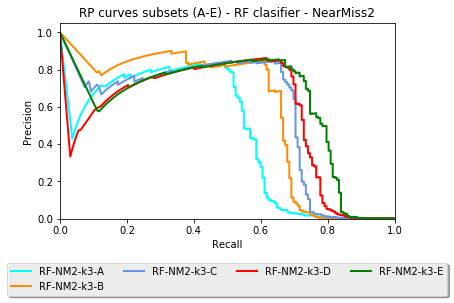

In [57]:
# RANDOM FOREST TEST SET

colors = ['aqua', 'darkorange', 'cornflowerblue', "red","green"]
y_test_prob_sets = [y_test_prob_nm2_rf[0][:,1], y_test_prob_nm2_rf[1][:,1], y_test_prob_nm2_rf[2][:,1],y_test_prob_nm2_rf[3][:,1],y_test_prob_nm2_rf[4][:,1]]
titles=["RF-NM2-k3-A", "RF-NM2-k3-B", "RF-NM2-k3-C", "RF-NM2-k3-D","RF-NM2-k3-E"]
y_pred_sets = [y_test_pred_nm2_rf[0], y_test_pred_nm2_rf[1], y_test_pred_nm2_rf[2], y_test_pred_nm2_rf[3], y_test_pred_nm2_rf[4]]

plt.figure()
ax = plt.subplot(111)
for y_prob,y_pred, title, color in zip(y_test_prob_sets,y_pred_sets,titles, colors):
    # Compute ROC curve and area the curve
    precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_prob)
    auc = metrics.auc(recall, precision)
    plt.plot(recall, precision, color=color, lw=2, label='{}'.format(title, auc))
    f1 = metrics.f1_score(y_test,y_pred)
    print(f1,auc)

    #plt.plot([0, 1], [0, 1], color="navy",linestyle='--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('RP curves subsets (A-E) - RF clasifier - NearMiss2')
# Shrink current axis's height by 10% on the bottom
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=4)
plt.show()

## Histogram of predicted probabilities for NearMiss2 across different classifiers

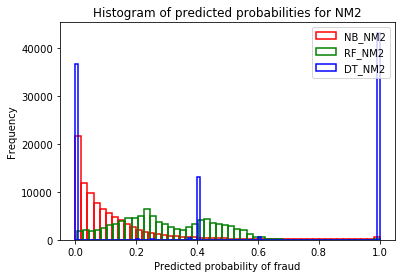

In [58]:
x = y_test_prob_nm2_nb[1][:,1]
y = y_test_prob_nm2_rf[4][:,1]
z = y_test_prob_nm2_dt[4][:,1]

fig, ax = plt.subplots()
ax.hist(x, 50, ec='red', fc='none', lw=1.5, label='NB_NM2')
ax.hist(y, 50, ec='green', fc='none', lw=1.5, label='RF_NM2')
ax.hist(z, 100, ec='blue', fc='none', lw=1.5, label='DT_NM2')
ax.legend(loc='upper right')
plt.title("Histogram of predicted probabilities for NM2")
plt.xlabel("Predicted probability of fraud")
plt.ylabel("Frequency")
plt.show()

## PROBABILITIES for Fraud and Non_Fraud

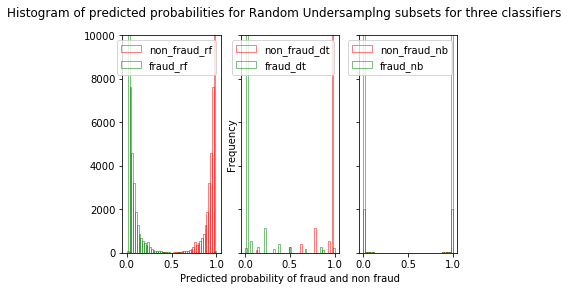

In [59]:
# Random undersampling

x = y_test_prob_rf[4][:,0]
y = y_test_prob_rf[4][:,1]
x1 = y_test_prob_dt[4][:,0]
y1 = y_test_prob_dt[4][:,1]
x2 = y_test_prob_nb[4][:,0]
y2 = y_test_prob_nb[4][:,1]

f, (ax, ax1, ax2) = plt.subplots(1, 3, sharey=True)
f.suptitle('Histogram of predicted probabilities for Random Undersamplng subsets for three classifiers')

#fig, ax = plt.subplots()
ax.hist(x, 50, ec='red', fc='none', lw=0.5, label='non_fraud_rf')
ax.hist(y, 50, ec='green', fc='none', lw=0.5, label='fraud_rf')
ax.legend(loc='upper right')
ax1.hist(x1, 50, ec='red', fc='none', lw=0.5, label='non_fraud_dt')
ax1.hist(y1, 50, ec='green', fc='none', lw=0.5, label='fraud_dt')
ax1.legend(loc='upper right')
ax2.hist(x2, 50, ec='red', fc='none', lw=0.5, label='non_fraud_nb')
ax2.hist(y2, 50, ec='green', fc='none', lw=0.5, label='fraud_nb')
ax2.legend(loc='upper right')
f.subplots_adjust(hspace=0.3)
ax1.set(xlabel="Predicted probability of fraud and non fraud", ylabel='Frequency')
plt.ylim(0,10000)
plt.show()

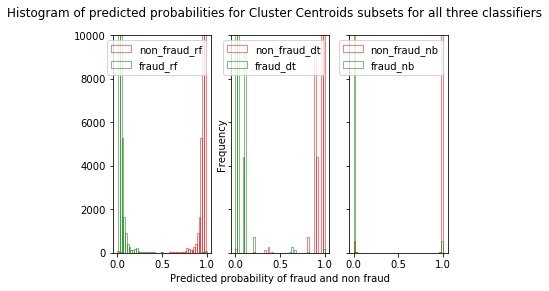

In [60]:
# Cluster Centroids

x = y_test_prob_cc_rf[4][:,0]
y = y_test_prob_cc_rf[4][:,1]
x1 = y_test_prob_cc_dt[4][:,0]
y1 = y_test_prob_cc_dt[4][:,1]
x2 = y_test_prob_cc_nb[4][:,0]
y2 = y_test_prob_cc_nb[4][:,1]

f, (ax, ax1, ax2) = plt.subplots(1, 3, sharey=True)
f.suptitle('Histogram of predicted probabilities for Cluster Centroids subsets for all three classifiers')

#fig, ax = plt.subplots()
ax.hist(x, 50, ec='red', fc='none', lw=0.5, label='non_fraud_rf')
ax.hist(y, 50, ec='green', fc='none', lw=0.5, label='fraud_rf')
ax.legend(loc='upper right')
ax1.hist(x1, 50, ec='red', fc='none', lw=0.5, label='non_fraud_dt')
ax1.hist(y1, 50, ec='green', fc='none', lw=0.5, label='fraud_dt')
ax1.legend(loc='upper right')
ax2.hist(x2, 50, ec='red', fc='none', lw=0.5, label='non_fraud_nb')
ax2.hist(y2, 50, ec='green', fc='none', lw=0.5, label='fraud_nb')
ax2.legend(loc='upper right')
f.subplots_adjust(hspace=0.3)
ax1.set(xlabel="Predicted probability of fraud and non fraud", ylabel='Frequency')
#plt.title("Histogram of predicted probabilities for RF_NM1")
#plt.xlabel("Predicted probability of fraud and non fraud")
#plt.ylabel("Frequency")
plt.ylim(0,10000)
plt.show()

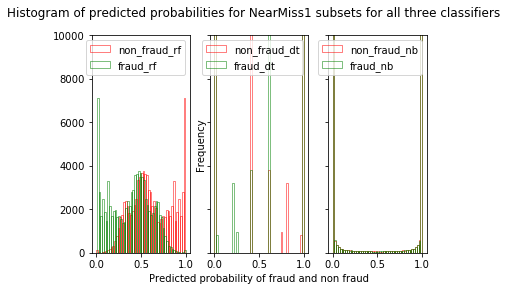

In [61]:
# NearMiss1

x = y_test_prob_nm1_rf[4][:,0]
y = y_test_prob_nm1_rf[4][:,1]
x1 = y_test_prob_nm1_dt[4][:,0]
y1 = y_test_prob_nm1_dt[4][:,1]
x2 = y_test_prob_nm1_nb[4][:,0]
y2 = y_test_prob_nm1_nb[4][:,1]

f, (ax, ax1, ax2) = plt.subplots(1, 3, sharey=True)
f.suptitle('Histogram of predicted probabilities for NearMiss1 subsets for all three classifiers')

#fig, ax = plt.subplots()
ax.hist(x, 50, ec='red', fc='none', lw=0.5, label='non_fraud_rf')
ax.hist(y, 50, ec='green', fc='none', lw=0.5, label='fraud_rf')
ax.legend(loc='upper right')
ax1.hist(x1, 50, ec='red', fc='none', lw=0.5, label='non_fraud_dt')
ax1.hist(y1, 50, ec='green', fc='none', lw=0.5, label='fraud_dt')
ax1.legend(loc='upper right')
ax2.hist(x2, 50, ec='red', fc='none', lw=0.5, label='non_fraud_nb')
ax2.hist(y2, 50, ec='green', fc='none', lw=0.5, label='fraud_nb')
ax2.legend(loc='upper right')
f.subplots_adjust(hspace=0.3)
ax1.set(xlabel="Predicted probability of fraud and non fraud", ylabel='Frequency')
#plt.title("Histogram of predicted probabilities for RF_NM1")
#plt.xlabel("Predicted probability of fraud and non fraud")
#plt.ylabel("Frequency")
plt.ylim(0,10000)
plt.show()

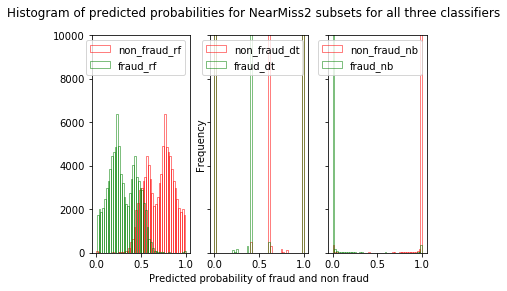

In [62]:
# NearMiss2

x = y_test_prob_nm2_rf[4][:,0]
y = y_test_prob_nm2_rf[4][:,1]
x1 = y_test_prob_nm2_dt[4][:,0]
y1 = y_test_prob_nm2_dt[4][:,1]
x2 = y_test_prob_nm2_nb[4][:,0]
y2 = y_test_prob_nm2_nb[4][:,1]

f, (ax, ax1, ax2) = plt.subplots(1, 3, sharey=True)
f.suptitle('Histogram of predicted probabilities for NearMiss2 subsets for all three classifiers')

#fig, ax = plt.subplots()
ax.hist(x, 50, ec='red', fc='none', lw=0.5, label='non_fraud_rf')
ax.hist(y, 50, ec='green', fc='none', lw=0.5, label='fraud_rf')
ax.legend(loc='upper right')
ax1.hist(x1, 50, ec='red', fc='none', lw=0.5, label='non_fraud_dt')
ax1.hist(y1, 50, ec='green', fc='none', lw=0.5, label='fraud_dt')
ax1.legend(loc='upper right')
ax2.hist(x2, 50, ec='red', fc='none', lw=0.5, label='non_fraud_nb')
ax2.hist(y2, 50, ec='green', fc='none', lw=0.5, label='fraud_nb')
ax2.legend(loc='upper right')
f.subplots_adjust(hspace=0.3)
ax1.set(xlabel="Predicted probability of fraud and non fraud", ylabel='Frequency')
#plt.title("Histogram of predicted probabilities for RF_NM1")
#plt.xlabel("Predicted probability of fraud and non fraud")
#plt.ylabel("Frequency")
plt.ylim(0,10000)
plt.show()

### Conslusion :

- The effect of incorrect interpolation in Precision-Recall (PR) space is obvious for Naïve Bayes classifier in all sampling techniques since the PR curve is a diagonal line. The similar effect can be seen for Decision Tree. The effect of incorrect interpolation on the AUC-PR is especially pronounced when two points are far away in Recall and Precision and the local skew is high (Davis, Goadrich 2006). 
- As it was mentioned earlier Naïve Byes predicts the probabilities as 0 or 1 and there is no a gradual increase in TP and FP. The similar behavior is with Decision Tree. According to (Davis, Goadrich 2006) in these cases, linear interpolation is a mistake that yields an overly optimistic estimate of AUC that is close to 0.5 but in fact it is much lower.
- Since Random Forest shows different behavior in probabilities distribution, the PR curve for Random Forest demonstrates the best trade-off between precision and recall especially at the point (0.8,0.8) according to all figures.
- Random Forest with NearMiss-1 demonstrates the worst f1 score according to confusion matrix but the best average AUC score across all subsets for different thresholds. AUC score for Random oversampling with Random Forest in average shows good results with very low running time. 
- The running times for the Cluster Centroids and NearMiss2 are the highest.
- The AUC sore for Random Forest with NearMiss-2 is the worst. Random Forest overfit with NeraMiss-2 on the training data with AUC=1 for almost all subsets but generalize poorly on the test set. 
- Subset E with Random Forest demonstrates the best performance with f1 score and AUC measure with all undersampling techiques.



In [63]:

def plotData(pca_data, y_train, sampling):
    y_train_df = pd.DataFrame(y_train)
    y_train_df.columns = ["labels"]
    all_DF = pd.concat([pca_data, y_train_df], axis = 1)
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    targets = [0,1]
    colors = ["r", "g"]
    for target, color in zip(targets, colors):
        plt.scatter(all_DF.loc[all_DF.labels == target,"V1"], all_DF.loc[all_DF.labels == target, 'V4'], c = color, s=50)
    ax.set_xlabel('V1', fontsize = 15)
    ax.set_ylabel('V4', fontsize = 15)
    ax.set_title('Train data after {} undersampling \n'.format(sampling), fontsize = 20)
    ax.legend(targets)
    ax.grid()
    plt.show()

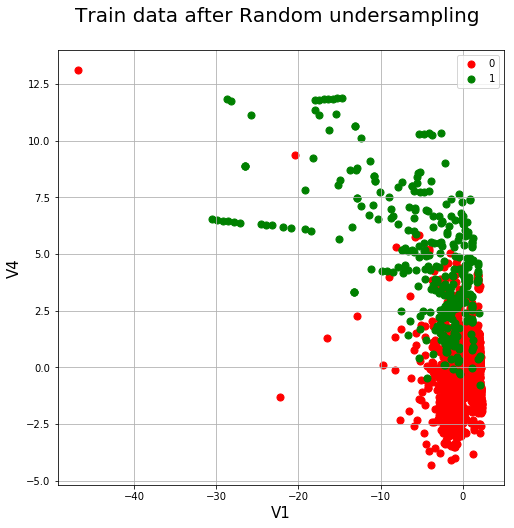

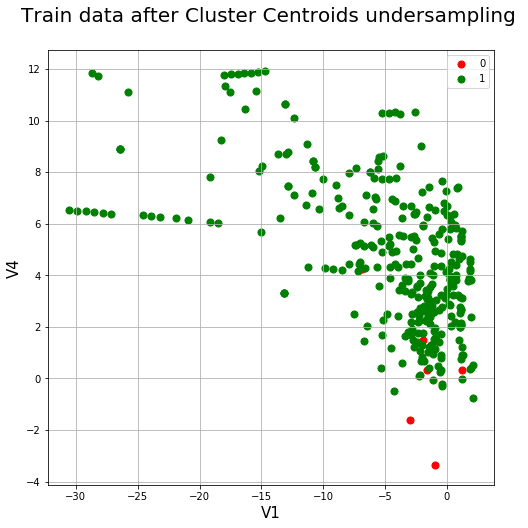

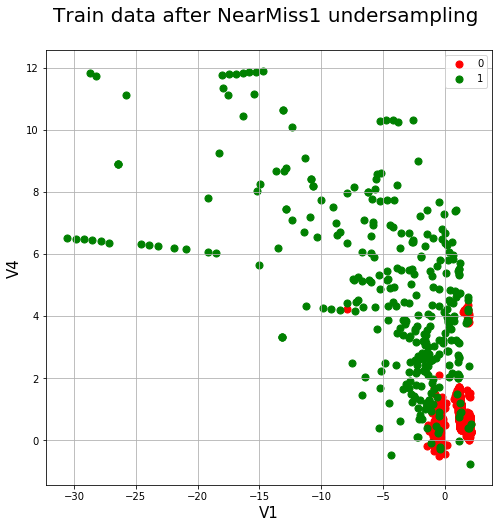

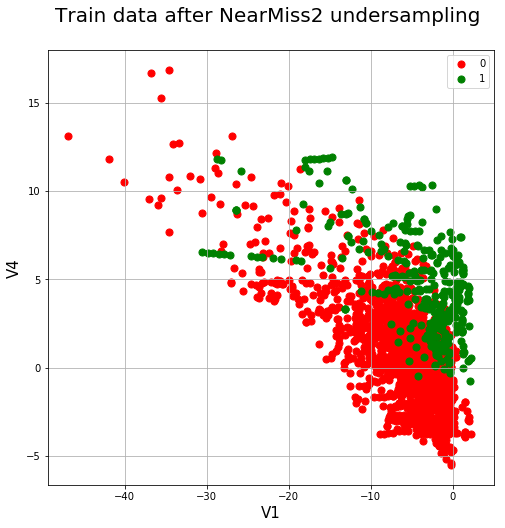

In [64]:
pca_data = [dict_data_X_train["E"][['V1','V4']], dict_data_X_train_cc["E"][["V1", "V4"]], dict_data_X_nm1_k3["E"][["V1", "V4"]], dict_data_X_nm2_k3["E"][["V1", "V4"]]]
y_train_data = [dict_data_y_train["E"], dict_data_y_train_cc["E"], dict_data_y_nm1_k3["E"], dict_data_y_nm2_k3["E"]]
samplings = ["Random", "Cluster Centroids", "NearMiss1", "NearMiss2"]
for data, y, sampling in zip(pca_data, y_train_data, samplings):
    plotData(data, y, sampling)
